<a href="https://colab.research.google.com/github/ikyro/mnist/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download `training data` and `test data`

In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.MNIST(
  root='data',
  train=True,
  download=True,
  transform=ToTensor()
)

test_data = datasets.MNIST(
  root='data',
  train=False,
  download=True,
  transform=ToTensor()
)

100%|██████████| 9912422/9912422 [00:00<00:00, 154122826.26it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 88744098.04it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 41453480.36it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 5111491.49it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



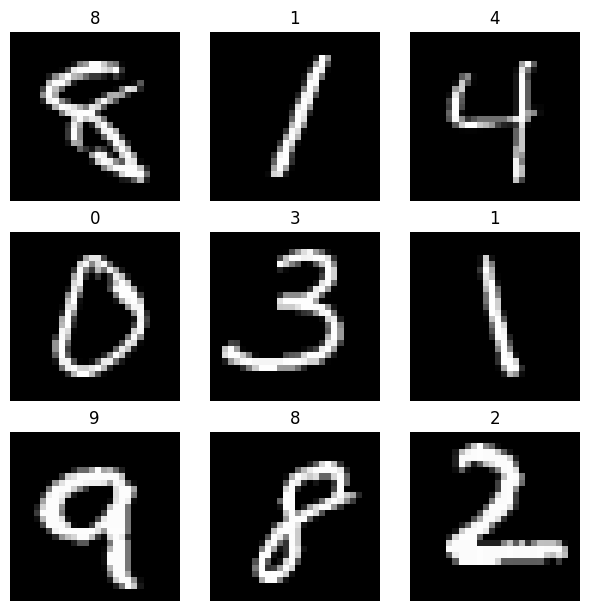

In [2]:
import matplotlib.pyplot as plt
import torch

figure = plt.figure(figsize=(6, 6), layout='constrained')
cols = 3
rows = 3

for i in range(cols * rows):
  rand_index = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[rand_index]
  figure.add_subplot(rows, cols, i + 1)
  plt.title(label)
  plt.axis('off')
  plt.imshow(img.squeeze(), cmap='gray')

plt.show()

In [3]:
print(
  f'training data size: {training_data.data.size()}',
  f'test data size: {test_data.data.size()}',
  sep='\n'
)

#print(training_data.data.size()[1:])

training data size: torch.Size([60000, 28, 28])
test data size: torch.Size([10000, 28, 28])


In [4]:
from torch import cuda

device = 'cuda' if cuda.is_available() else 'cpu'

print(f'using: {device}')

using: cuda


In [20]:
from torch import nn, autocast

class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()

    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
      nn.Linear(in_features=28*28, out_features=512),
      nn.ReLU(),
      nn.Linear(in_features=512, out_features=512),
      nn.ReLU(),
      nn.Linear(in_features=512, out_features=10),
      nn.Softmax()
    )

  @autocast(device_type=device)
  def forward(self, x):
    x = self.flatten(x)
    print(x)

    logits = self.linear_relu_stack(x)

    return logits

In [21]:
from torch.utils.data import DataLoader

training_loader = DataLoader(
  training_data,
  batch_size=100,
  shuffle=True,
  num_workers=2,
  pin_memory=True,
)

test_loader = DataLoader(
  test_data,
  batch_size=100,
  shuffle=True,
  num_workers=2,
  pin_memory=True,
)

In [22]:
model = NeuralNetwork().to(device)

# Training Model

In [23]:
from torch import nn, optim
import numpy as np

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())
epochs = 5

def train_model():
  for i, (inputs, labels) in enumerate(training_loader):
    inputs = inputs.to(device)
    labels = torch.tensor(labels).to(device)

    optimizer.zero_grad()

    with autocast(device_type=device):
      outputs = model(inputs)
      loss = loss_fn(outputs, labels)
    
    loss.backward()
    optimizer.step()

    if i % 10 == 0:
      loss = loss.item()
      current = (i + 1) * len(inputs)

      print(f'loss: {loss:.4f} [{current:>5d}/{len(training_data):>5d}]')
  
for epoch in range(1, epochs + 1):
  print(f'training epoch: {epoch}/{epochs}')

  model.train()
  train_model()


training epoch: 1/5
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')
loss: 2.3030 [  100/60000]
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
       

<ipython-input-23-5279848b1b64>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels).to(device)
/usr/local/lib/python3.9/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0

KeyboardInterrupt: ignored

# Evaluation Model

In [19]:
def eval_model():
  val_loss = []
  val_acc = []

  with torch.no_grad():
    for i, (inputs, labels) in enumerate(test_loader):
      inputs = inputs.to(device)
      labels = torch.tensor(labels).to(device)

      with autocast(device_type=device):
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)

        val_loss.append(loss.item())
        val_acc.append((outputs.argmax(1) == labels).float().mean().item())
        print(f"evaluation loss: {np.mean(val_loss):.4f} evaluation accuracy: {np.mean(val_acc):.4f}")

for epoch in range(1, epochs + 1):
  print(f'evaluation epoch: {epoch}/{epochs}')

  model.eval()
  eval_model()

evaluation epoch: 1/5
evaluation loss: 1.4926 evaluation accuracy: 0.9700
evaluation loss: 1.4993 evaluation accuracy: 0.9650
evaluation loss: 1.4964 evaluation accuracy: 0.9667
evaluation loss: 1.4960 evaluation accuracy: 0.9675

<ipython-input-19-4e3105452802>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels).to(device)



evaluation loss: 1.4992 evaluation accuracy: 0.9620
evaluation loss: 1.5013 evaluation accuracy: 0.9617
evaluation loss: 1.5014 evaluation accuracy: 0.9614
evaluation loss: 1.5036 evaluation accuracy: 0.9587
evaluation loss: 1.5024 evaluation accuracy: 0.9578
evaluation loss: 1.4993 evaluation accuracy: 0.9610
evaluation loss: 1.4997 evaluation accuracy: 0.9609
evaluation loss: 1.5038 evaluation accuracy: 0.9567
evaluation loss: 1.5055 evaluation accuracy: 0.9554
evaluation loss: 1.5068 evaluation accuracy: 0.9536
evaluation loss: 1.5047 evaluation accuracy: 0.9560
evaluation loss: 1.5045 evaluation accuracy: 0.9562
evaluation loss: 1.5043 evaluation accuracy: 0.9565
evaluation loss: 1.5072 evaluation accuracy: 0.9539
evaluation loss: 1.5062 evaluation accuracy: 0.9547
evaluation loss: 1.5054 evaluation accuracy: 0.9555
evaluation loss: 1.5056 evaluation accuracy: 0.9552
evaluation loss: 1.5058 evaluation accuracy: 0.9550
evaluation loss: 1.5050 evaluation accuracy: 0.9557
evaluation 

In [ ]:
torch.save(model.state_dict(), 'model.ckpt')